<a href="https://colab.research.google.com/github/Sonochy/UoA_school_mission-12/blob/dev_UNet/LPE_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [惑星探査育英会　第十二回実習会](https://www.cps-jp.org/~tansaku/wiki/top/?school_mission-12)
pix2pixを用いたsemantic segmentation

## 参考URL



*   [Colaboratory へようこそ](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja#scrollTo=-Rh3-Vt9Nev9)
*   [Google Colaboratory での Terminal 操作](https://qiita.com/shirobu2400/items/2fad1d24053b7cb35547)
*   [Google Colaboratoryをもっと便利に使いたい](https://karaage.hatenadiary.jp/entry/2018/12/17/073000)
*   [Image Segmentation with tf.keras](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/outreach/blogs/segmentation_blogpost/image_segmentation.ipynb#scrollTo=cl79rk4KKol8)
*   リスト項目


## スペック確認

カレントディレクトリ確認

In [1]:
!pwd
!ls

/content
drive  sample_data


OS確認

In [2]:
!cat /etc/issue

Ubuntu 18.04.3 LTS \n \l



メモリ確認

In [3]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        595M         10G        904K        2.1G         11G
Swap:            0B          0B          0B


In [4]:
!cat /proc/cpuinfo 

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

 GPUのスペック確認

In [5]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla K80
IRQ:   		 35
GPU UUID: 	 GPU-64d328d8-b3d9-24cb-9306-ecaad12d7c8c
Video BIOS: 	 80.21.25.00.02
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


Google Colabの起動してからの時間確認

In [6]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.00187905days (162.35sec)


## ライブラリ Install

In [7]:
pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 49kB/s 
     |████████████████████████████████| 3.2MB 38.9MB/s 
     |████████████████████████████████| 368kB 44.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [8]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


## ドライブにマウント

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls

drive  sample_data


In [11]:
% cd drive/'My Drive'/

/content/drive/My Drive


In [12]:
! git clone https://github.com/IsHYuhi/LPE_U-Net.git

Cloning into 'LPE_U-Net'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 5), reused 22 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [13]:
% cd LPE_U-Net/

/content/drive/My Drive/LPE_U-Net


In [14]:
%%shell
FILE_ID=1FhUPqiTR1VF0_hXFtIEVuaP3W6JU4zsv
FILE_NAME=data_set.zip
curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=${FILE_ID}" > /dev/null
CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"
curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=${FILE_ID}" -o ${FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2081      0 --:--:-- --:--:-- --:--:--  2081
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  139M    0  139M    0     0  12.4M      0 --:--:--  0:00:11 --:--:-- 15.7M


In [15]:
%%shell
FILE_ID=1h-2UGjTifXJA7jyaBe085_3cPeAHEEda
FILE_NAME=checkpoint.zip
curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=${FILE_ID}" > /dev/null
CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"
curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=${FILE_ID}" -o ${FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2318      0 --:--:-- --:--:-- --:--:--  2318
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  222M    0  222M    0     0  18.1M      0 --:--:--  0:00:12 --:--:-- 24.3M


In [16]:
! ls

checkpoint.zip	data_set  data_set.zip	main.py  README.md  util


In [17]:
! unzip data_set.zip

Archive:  data_set.zip
   creating: data_set/test_images/
  inflating: __MACOSX/data_set/._test_images  
   creating: data_set/train_annotations/
  inflating: __MACOSX/data_set/._train_annotations  
  inflating: data_set/.DS_Store      
  inflating: __MACOSX/data_set/._.DS_Store  
   creating: data_set/val_images/
  inflating: __MACOSX/data_set/._val_images  
   creating: data_set/val_annotations/
  inflating: __MACOSX/data_set/._val_annotations  
   creating: data_set/test_annotations/
  inflating: __MACOSX/data_set/._test_annotations  
   creating: data_set/train_images/
  inflating: __MACOSX/data_set/._train_images  
  inflating: data_set/test_images/TCm_MI_MI_MAPm04_N00E000S03E003SC_22_20.png  
  inflating: __MACOSX/data_set/test_images/._TCm_MI_MI_MAPm04_N00E000S03E003SC_22_20.png  
  inflating: data_set/test_images/TCm_MI_MI_MAPm04_N00E000S03E003SC_22_08.png  
  inflating: __MACOSX/data_set/test_images/._TCm_MI_MI_MAPm04_N00E000S03E003SC_22_08.png  
  inflating: data_set/test_ima

In [19]:
!ls data_set/train_images
!ls data_set/train_annotations

TCm_MI_MI_MAPm04_N00E000S03E003SC_01_01.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_02.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_03.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_04.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_05.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_06.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_07.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_08.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_09.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_10.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_11.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_12.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_13.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_14.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_15.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_16.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_17.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_18.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_19.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_20.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_21.png
TCm_MI_MI_MAPm04_N00E000S03E003SC_01_22.png
TCm_MI_MI_MAPm04_N00E000S03E003S

In [0]:
! unzip checkpoint.zip

In [29]:
!ls pre_model/

pre_model.ckpt.data-00000-of-00001  pre_model.ckpt.index  pre_model.ckpt.meta


# 訓練データの学習


|省略オプション|オプション|使用方法|デフォルト|
|---|---|---|---|
|-g|--gpu| -g でgpu使用|False|
|-e|--epoch| -e　n でエポック数指定|50|
|-b|--batch| -b n でバッチサイズ指定|4|
|-t|--trainrate| -t 0.0~1.0 で訓練データの割合指定|0.7|
|-l|--l2lreg| -l f でregularizer指定|0.0001|
|-n|--num| -n n で画像の枚数指定|None|
|-s|--size| -s 128 128 で画像のサイズ指定|(128, 128)|
|-r|--size| -r restoreするcheckpoint名 でチェックポイントから学習再開|None|


In [21]:
! python main.py -g -e 50 -b 4 -t 0.7 -l 0.0001 -n 504

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## 推論用のLoader 

In [0]:
from PIL import Image
import numpy as np
import glob
import os
import random
from natsort import natsorted


class LoaderForPredict(object):
    def __init__(self, dir_original, init_size=(128, 128)):
        self._data = LoaderForPredict.import_data(dir_original, init_size)

    def get_dataset(self):
        return self._data

    @staticmethod
    def import_data(dir_original, init_size=None):
        paths_original = LoaderForPredict.generate_paths(dir_original)
        # pathをファイル順にソートする
        paths_original = natsorted(paths_original)

        images_original, images_original_size = LoaderForPredict.extract_images(paths_original, init_size)

        image_sample_palette = Image.open(paths_original[0])#一枚の画像からパレットを取り出す
        #print(im.shape) #パレットのshapeを確認
        image_sample_palette = image_sample_palette.convert("P")
        palette = image_sample_palette.getpalette()

        #任意のパッレットカラーを割り当てる。今回のタスクは三クラスなので自分で割り当て
        palette[3] = 255
        palette[7] = 255

        return DataSet(images_original, images_original_size, None, palette)

    @staticmethod
    def extract_images(paths_original, init_size):
        images_original,images_original_size = [], []

        # Load images
        print("Loading original images", end="", flush=True)
        for image, original_size in LoaderForPredict.image_generator(paths_original, init_size, antialias=True):
            images_original.append(image)
            images_original_size.append(original_size)
            if len(images_original) % 100 == 0:
                print(".", end="", flush=True)
        print(" Completed", flush=True)

        # Cast to ndarray
        images_original = np.asarray(images_original, dtype=np.float32)

        return images_original, images_original_size

    @staticmethod
    def image_generator(file_paths, init_size=None, antialias=True, normalization=True):
        for file_path in file_paths:
            if file_path.endswith(".png") or file_path.endswith(".jpg"):

                image = Image.open(file_path)
                original_size = (image.width, image.height)

                if antialias:
                    image = image.resize(init_size, Image.ANTIALIAS)
                else:
                    image = image.resize(init_size)

                # delete alpha channel
                if image.mode == "RGBA":
                    image = image.convert("RGB")
                image = np.asarray(image)
                if normalization:
                    image = image / 255.0
                yield image, original_size

    @staticmethod
    def generate_paths(dir_original):
        paths_original = glob.glob(dir_original + "/*")
        filenames = list(map(lambda path: path.split(os.sep)[-1].split(".")[0], paths_original))#.以降を削除し、ファイルネームのみにする
        paths_original = list(map(lambda filename: dir_original + "/" + filename + ".png", filenames))#ファイルネーム.pngにする

        return paths_original


class DataSet(object):
    def __init__(self, images_original, images_original_size, file_name, image_palette):
        self._images_original = images_original
        self._images_original_size = images_original_size
        self._file_name = file_name
        self._image_palette = image_palette

    @property
    def images_original(self):
        return self._images_original

    @property
    def images_original_size(self):
        return self._images_original_size

    @property
    def palette(self):
        return self._image_palette

    @property
    def len(self):
        return len(self._images_original)

In [39]:
!ls checkpoint

checkpoint
save_model_done.ckpt.data-00000-of-00001
save_model_done.ckpt.index
save_model_done.ckpt.meta
save_model_epoch_0_.ckpt.data-00000-of-00001
save_model_epoch_0_.ckpt.index
save_model_epoch_0_.ckpt.meta
save_model_epoch_10_.ckpt.data-00000-of-00001
save_model_epoch_10_.ckpt.index
save_model_epoch_10_.ckpt.meta
save_model_epoch_20_.ckpt.data-00000-of-00001
save_model_epoch_20_.ckpt.index
save_model_epoch_20_.ckpt.meta
save_model_epoch_30_.ckpt.data-00000-of-00001
save_model_epoch_30_.ckpt.index
save_model_epoch_30_.ckpt.meta
save_model_epoch_40_.ckpt.data-00000-of-00001
save_model_epoch_40_.ckpt.index
save_model_epoch_40_.ckpt.meta


## ndarryからPILimageへ変換

In [0]:
def cast_to_out_image(ndarray, size, palette):
  res = np.argmax(ndarray, axis=2)
  image = Image.fromarray(np.uint8(res), mode="P")
  image.putpalette(palette)
  image = image.resize(size)
  return image

def cast_to_out_image_in(ndarray, size):
  image = Image.fromarray(np.uint8(ndarray * 255), mode="RGB")
  image = image.resize(size)
  return image

## 推論プログラム

In [36]:
import random
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import easydict
from util import model
from util import repoter as rp

#画像の枚数

def load_dataset():
    #you can replace path to data_set/test_images, data_set/val_images
    loader = LoaderForPredict(dir_original="data_set/train_images", init_size=(128, 128))
    return loader.get_dataset()


def implement(parser):
    tf.reset_default_graph()
    #image data
    train = load_dataset()

    #the number of images
    num = parser.num

    #reporter
    reporter = rp.Reporter(parser=parser)

    # GPU
    gpu = parser.gpu

    #model
    model_unet = model.UNet(size=(128, 128), l2_reg=parser.l2reg).model

    # Initialize session
    gpu_config = tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.7, visible_device_list="", allow_growth=True), #device_count={'GPU': 0},
                                log_device_placement=False, allow_soft_placement=True)
    if gpu:
        sess = tf.InteractiveSession(config=gpu_config)
        print("gpu mode")
    else:
        sess = tf.InteractiveSession()
        print("cpu mode")

    tf.global_variables_initializer().run()


    #Sarver
    saver = tf.train.Saver()
    #学習済みのモデルを指定してロード
    saver.restore(sess, "./pre_model/pre_model.ckpt")
    pred_images = []
    in_images = []
    for idx_train in range(train.len):
      train_images_original = train.images_original
      images_original_size = train.images_original_size
      
      outputs_train = sess.run(model_unet.outputs,
                                         feed_dict={model_unet.inputs: [train_images_original[idx_train]],
                                                    model_unet.is_training: False})


      pred_image = cast_to_out_image(outputs_train[0], images_original_size[idx_train], train.palette)
      in_image = cast_to_out_image_in(train_images_original[idx_train], images_original_size[idx_train])

      pred_images.append(pred_image)
      in_images.append(in_image)

    print("Result")

    sess.close()
    return pred_images, in_images


def get_parser():

    args = easydict.EasyDict({
        "batchsize": 1,
        "epoch": 300,
        "gpu": True,
        "l2reg":0.0001,
        "num":504
    })
    
    return args


parser = get_parser()
pred_images, in_images = implement(parser)

Loading original images..... Completed


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


gpu mode
INFO:tensorflow:Restoring parameters from ./pre_model/pre_model.ckpt
Result


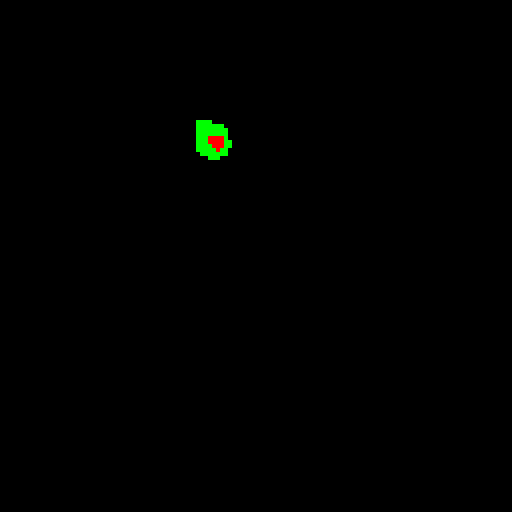

In [38]:
pred_images[304]

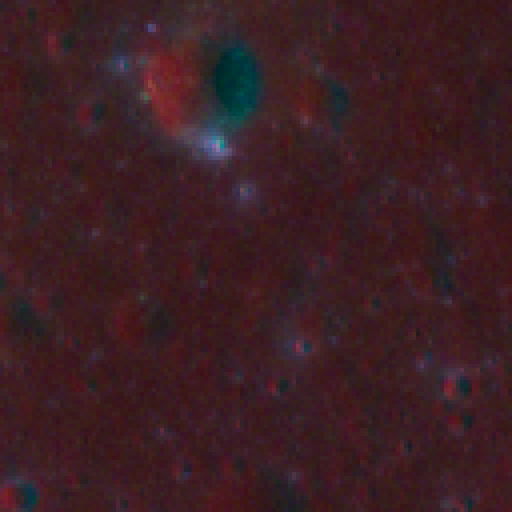

In [37]:
in_images[304]